# Reinforcement Learning

Reinforcement learning is training machine learning models to make a sequence of decisions. A software **agent** makes **observations** and takes actions within an **environment** to receive rewards. Its objective is to learn to act in a way that maximizes its expected rewards over time.  

The model employs trial and error to come up with a solution to the problem. It gets either rewards or penalties for the actions it performs with the goal to maximize the total reward. Although the designer sets the reward policy (the rules of the game), he/she gives the model no hints or suggestions for how to solve the game. The model must figure out how to perform the task to maximize the reward.

# Policy Search

A **policy** is the algorithm a software agent uses to determine its actions. The **policy space** is a mapping from perceived states of the environment to actions to be taken when in those states.

# OpenAI Gym

We need a working environment to train an agent. *OpenAI Gym* is a toolkit that provides a wide variety of simulated environments including Atari games, board games, 2D and 3d physical simulations, and so on.

Resources:

https://colab.research.google.com/drive/18LdlDDT87eb8cCTHZsXyS9ksQPzL3i6H

https://colab.research.google.com/drive/1flu31ulJlgiRL1dnN2ir8wGh9p7Zij2t

https://stackoverflow.com/questions/50107530/how-to-render-openai-gym-in-google-colab

# Install and Configure OpenAI Gym on Colab

Most of the requirements of python packages are already fulfilled on CoLab. To run Gym, install prerequisites:

In [1]:
!pip install gym
!apt-get install python-opengl -y
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 2s (289 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 784 kB of 

For the rendering environment, use pyvirtualdisplay:

In [2]:
!pip install pyvirtualdisplay
!pip install piglet

     |████████████████████████████████| 71kB 3.8MB/s 


# Import **tensorflow** library

Import library and alias it:

In [3]:
import tensorflow as tf

# GPU Hardware Accelerator

To vastly speed up processing, we can use the GPU available from the Google Colab cloud service. Colab provides a free Tesla K80 GPU of about 12 GB. It’s very easy to enable the GPU in a Colab notebook:

1.	click **Runtime** in the top left menu
2.	click **Change runtime** type from the drop-down menu
3.	choose **GPU** from the Hardware accelerator drop-down menu
4.	click **SAVE**

Verify that GPU is available:

In [4]:
tf.__version__, tf.test.gpu_device_name()

('2.5.0', '/device:GPU:0')

# Import Requisite Libraries

To activate the virtual display:

In [5]:
import pyvirtualdisplay

display = pyvirtualdisplay.Display(
    visible=0, size=(1400, 900)).start()

Import the **gym** library:

In [6]:
import gym

# Create an Environment

Create a **CartPole** environment:

In [7]:
env = gym.make('CartPole-v1')

The *CartPole* environment is a 2D simulation that accelerates a cart left or right to balance a pole placed on top of it. A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright and the goal is to prevent it from falling over.

Initialize the environment by calling is reset() method, which returns an observation:

In [8]:
env.seed(0)
obs = env.reset()
obs

array([-0.04456399,  0.04653909,  0.01326909, -0.02099827])

Observations vary depending on the environment. In this case, it is a 1D numpy array composed of 4 floats that represent the cart's horizontal position, velocity, angle of the pole (0 = vertical), and angular velocity. Any positive number indicates movement to the **right** for angle of the pole and angular velocity. Any negative number indicates movement to the **left**. For horizontal position, a negative number means that it is tilting left and a positive number to the right. For velocity, a positive number means the cart is speeding up and a negative number slowing down.

So the pole is not completely horizontal (obs[0] is slightly negative), its velocity is slowly increasing (obs[1] is slightly positive), the pole is angled slightly to the right (obs[2] is slightly positive), and the angular velocity is going toward the left (obs[3] is slightly negative).

An environment can be visualized by calling its render() method, and you can pick the rendering mode (the rendering options depend on the environment).

In [9]:
env.render()

True

# Display the Environment

Set mode='rgb_array' to get an image of the environment as a NumPy array:

In [10]:
img = env.render(mode='rgb_array')
img.shape

(400, 600, 3)

Create a function to display the environment as configured:

In [11]:
def plot_environment(env, figsize=(5,4)):
  plt.figure(figsize=figsize)
  img = env.render(mode='rgb_array')
  plt.imshow(img)
  plt.axis('off')
  return img

Display:

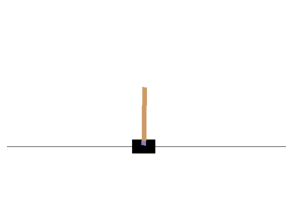

In [12]:
import matplotlib.pyplot as plt

plot_environment(env)
plt.show()

# Display Actions

Let's see how to interact with the environment we created. The agent needs to select an action from an action space. An **action space** is the set of possible actions that an agent can take.

Ask the environment about possible actions:

In [13]:
env.action_space

Discrete(2)

**Discrete(2)** means that the possible actions are integers 0 and 1, which represents accelerating left (0) or right (1). So the environment's action space has two possible actions. The agent can accelerate towards the left or towards the right. Of course, other environments may have additional discrete actions or other kinds of actions like continuous ones.

Reset the enviroment and see how the pole is leaning by looking at its angle:

In [14]:
env.seed(0)
obs = env.reset()
indx = 2
obs[indx]

0.013269094558410327

The third position (index of 2) in the *obs* array is the angle of the pole. If the value is below 0, the pole angles to the left. If above 0, it angles to the right. The pole is moving slightly toward the right because **obs[2] is > 0**.

The CartPole environment only has two actions, left (0) or right (1). Let's accelerate the cart toward the right by setting **action=1**:

In [15]:
action = 1
obs, reward, done, info = env.step(action)
print ('obs array:', obs)
print ('reward:', reward)
print ('done:', done)
print ('info:', info)

obs array: [-0.04363321  0.24146826  0.01284913 -0.30946528]
reward: 1.0
done: False
info: {}


The **step()** method executes the given action and returns four values. **obs** is the new observation. The cart is now moving toward the right because **obs[1] > 0**. The pole is still tilted toward the right because **obs[2] > 0**, but its angular velocity is now negative because **obs[3] < 0**. So it will likely be tilted toward the left after the next step. In this simple environment, *reward* is always *1.0* at every step. So the goal is to keep the episode running as long as possible. The *done* value is *True* when the episode is over. The episode is over if the pole tilts too much, goes off the screen or we win the game. The *info* value provides extra information. Once we finish using an environment, call the **close()** method to free resources.

The environment tells the agent each new observation, the reward, when the game is over, and information it got during the last step.

Display the pole position:

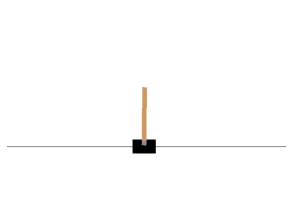

In [16]:
plot_environment(env)
plt.show()

Here is the reward the agent got during the last step:

In [17]:
reward

1.0

The game is not over yet:

In [18]:
done

False

The sequence of steps between the moment the environment is reset until it is done is called an **episode**. At the end of an episode (i.e., when step() returns done=True), reset the environment before continuing to use it.

In [19]:
if done:
  obs = env.reset()
else:
  print ('game is not over!')

game is not over!


# Simple Neural Network Policy

How can we make the poll remain upright? We need to define a policy, which is the strategy that the agent uses to select an action at each step. It can use all past actions and observations to decide what to do.

Let's create a neural network that takes observations as inputs and output the action to take for each observation. To choose an action, the network estimates a probability for each action and selects an action randomly according to the estimated probabilities. In the case of the Cart-Pole environment, there are just two possible actions (left or right). So we only need one output neuron that outputs the probability *p* of the action 0 (left), and of course the probability of action 1 (right) will be *1 - p*.

Clear previous models and generate a seed:

In [20]:
import numpy as np

tf.keras.backend.clear_session()
tf.random.set_seed(0)
np.random.seed(0)

Determine the observation space:

In [22]:
obs_space = env.observation_space.shape
obs_space

(4,)

As shown earlier in this notebook, the observation (or policy) space is a 1D numpy array composed of 4 floats that represent the cart's horizontal position, velocity, angle of the pole (0 = vertical), and angular velocity. So the policy space is 4.

Set the number of inputs:

In [23]:
n_inputs = env.observation_space.shape[0]
n_inputs

4

Create a model:

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
  Dense(5, activation='elu', input_shape=[n_inputs]),
  Dense(1, activation='sigmoid')
])

The model is a simple *Sequential* model that defines the policy network. The number of inputs is the size of the observation space, which is 4 in our case. We include only 5 neurons in the first layer because this is such a simple problem. We output a single probability (the probability of going left) so we have a single output neuron using sigmoid activation. If we had more than two possible actions, we would use one output neuron per action and substitute softmax activation.

In this particular environment, past actions and observations can safely be ignored because each observation contains the environment's full state. If there were some hidden state, we may need to consider past actions and observations to try to infer the hidden state of the environment. For example, if the environment only revealed the position of the cart but not its velocity, we have to consider not only the current observation but also the previous observation in order to estimate the current velocity. Another example is if the observations are noisy, we may want to use the past few observations to estimate the most likely current state. Our problem is as simple as can be because the current observation is noise-free and contains the environment's full state.

Why do we pick a random action based on the probability given by the policy network rather than just picking the action with the highest probability? This approach lets the agent find the right balance between exploring new actions and exploiting the actions that are known to work well.

# Model Predictions

Create a function that runs the model to play one episode and return the frames so we can display an animation:

In [25]:
def render_policy_net(model, n_max_steps=200, seed=0):
  frames = []
  env = gym.make('CartPole-v1')
  env.seed(seed)
  np.random.seed(seed)
  obs = env.reset()
  for step in range(n_max_steps):
    frames.append(env.render(mode='rgb_array'))
    left_proba = model.predict(obs.reshape(1, -1))
    action = int(np.random.rand() > left_proba)
    obs, reward, done, info = env.step(action)
    if done:
      break
  env.close()
  return frames

Establish the environment and reset it. Create a loop to run a number of steps until the episode is over. Begin each step by appending the visualization of the environment to the *frames* list. Continue making action predictions with the model. Next, establish an action based on prediction. Execute the *step()* method based on the action. Continue looping until the episode is over. End by returning the list of frames.

Create functions to show animation of the frames:

In [26]:
import matplotlib.animation as animation
import matplotlib as mpl

def update_scene(num, frames, patch):
  patch.set_data(frames[num])
  return patch,

def plot_animation(frames, repeat=False, interval=40):
  fig = plt.figure()
  patch = plt.imshow(frames[0])
  plt.axis('off')
  anim = animation.FuncAnimation(
      fig, update_scene, fargs=(frames, patch), blit=True,
      frames=len(frames), repeat=repeat, interval=interval)
  plt.close()
  return anim

Model predictions:

In [27]:
frames = render_policy_net(model)

# Animate

Additional resources:

https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/A.03-Animation-in-Jupyter-Notebooks.ipynb

https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb

Create the animation:

In [32]:
anim = plot_animation(frames, interval=100)

Experiment with the **interval** parameter size.

Render and display the animation. We show two ways to accomplish this. The first method uses the HTML library to display HTML elements. The animation is rendered to html5 video with the to_html5_video() function and then displayed with HTML():

In [34]:
from IPython.display import HTML

method1 = HTML(anim.to_html5_video())
method1

The second method uses the runtime configuration library:

In [35]:
from matplotlib import rc

method2 = rc('animation', html='html5')

Run the animation:

In [36]:
anim

Ugh! The pole is falling to the left! But, we didn't implement our basic policy to go left if the pole is tilting left and go right if it is tilting right.


# Implement a Basic Policy

Make the network play in 50 different environments in parallel to give us a diverse training batch at each step. Train for 5,000 iterations. Use the RMSProp optimizer. And, use binary cross-entropy for the loss function because we only have two discrete possible actions. Finally, reset the environments when they are done to free resources. We train with a custom training loop so we can easily use the predictions at each training step to advance the environments.

Train with a basic policy:

In [37]:
n_environments = 50
n_iterations = 5000

envs = [gym.make(
    'CartPole-v1') for _ in range(n_environments)]
for index, env in enumerate(envs):
  env.seed(index)
np.random.seed(0)
observations = [env.reset() for env in envs]
optimizer = tf.keras.optimizers.RMSprop()
loss_fn = tf.keras.losses.binary_crossentropy

for iteration in range(n_iterations):
  # if angle < 0, we want proba(left) = 1., or else proba(left) = 0.
  target_probas = np.array(
      [([1.] if obs[2] < 0 else [0.]) 
      for obs in observations])
  with tf.GradientTape() as tape:
    left_probas = model(np.array(observations))
    loss = tf.reduce_mean(
        loss_fn(target_probas, left_probas))
    print('\rIteration: {}, Loss: {:.3f}'.\
          format(iteration, loss.numpy()), end='')
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(
        zip(grads, model.trainable_variables))
    actions = (np.random.rand(n_environments, 1) >\
               left_probas.numpy()).astype(np.int32)
  for env_index, env in enumerate(envs):
    obs, reward, done, info = env.step(
        actions[env_index][0])
    observations[env_index] = obs if not done else env.reset()

for env in envs:
  env.close()

Iteration: 4999, Loss: 0.155

Create the frames for an animation:

In [38]:
frames = render_policy_net(model)

Animate:

In [39]:
anim = plot_animation(frames, repeat=True, interval=100)
anim

Much better!

# Reinforce Algorithm

Let's see if the agent can learn a better policy on its own. Policy gradients (PG) optimize the parameters of a policy by following the gradients toward higher rewards. We use a reinforce PG algorithm to automate agent learning.

Let the neural network policy play the game several times. At each step, compute the gradients that make the chosen action even more likely. But, don't apply the gradients yet. After running several episodes, compute each action's advantage with a discount factor at each step. A *discount factor* is computed by evaluating an action based on the sum of all rewards that come after the action. If an action's advantage is positive, the action was probably good. So apply the gradients to make the action more likely to be chosen in the future. If it is negative, apply the opposite gradients to make the action less likely to be chosen. Finally, compute the mean of all resultant gradient vectors (gradient (or opposite gradient) x action advantage) and use it to perform a *Gradient Descent* step.

## Train the Model

Train the model to learn to balance the pole on the cart.

 ## Create Functions to Play the Game

Create a function that plays one step: 

In [40]:
def play_one_step(env, obs, model, loss_fn):
  with tf.GradientTape() as tape:
    left_proba = model(obs[np.newaxis])
    action = (tf.random.uniform([1, 1]) > left_proba)
    y_target = tf.constant(
        [[1.]]) - tf.cast(action, tf.float32)
    loss = tf.reduce_mean(loss_fn(
        y_target, left_proba))
  grads = tape.gradient(loss, model.trainable_variables)
  obs, reward, done, info = env.step(
      int(action[0, 0].numpy()))
  return obs, reward, done, grads

With the *GradientTape* block, call the model with a single observation. We reshape the observation so that it becomes a batch containing a single instance (the model expects a batch). We get a probability of going left. Sample a random float between 0 and 1, and check if it greater than the probability. The *action* is **False** with probability *left_proba* and **True** with probability *1 - left_proba*. Cast this Boolean to a number of 0 (left) or 1 (right) with the appropriate probabilities. We then define the target probabilities of going left (1 - the action). If the action is 0 (left), the target probability of going left is 1. If the action is 1 (right), the target probability is 0. Whew!

We continue by computing the loss and use the tape to compute the gradient of the loss with regard to the model's trainable variables. We tweak the gradients later depending on how good or bad that action turned out to be. Finally, we play the selected action and return the new observation, reward, whether the episode is over or not, and the gradients.

Create a function to play multiple episodes and return the rewards and gradients for each episode and each step:

In [41]:
def play_multiple_episodes(
    env, n_episodes, n_max_steps, model, loss_fn):
  all_rewards = []
  all_grads = []
  for episode in range(n_episodes):
    current_rewards = []
    current_grads = []
    obs = env.reset()
    for step in range(n_max_steps):
      obs, reward, done, grads = play_one_step(
          env, obs, model, loss_fn)
      current_rewards.append(reward)
      current_grads.append(grads)
      if done:
        break
    all_rewards.append(current_rewards)
    all_grads.append(current_grads)
  return all_rewards, all_grads

The function returns a list of reward lists. The list contains one reward list per episode. Each reward list contains one reward per step. It also returns a list of gradient lists. The list contains one gradient list per episode. Each gradient list contains one tuple of gradients per step. Each tuple contains one gradient tensor per trainable variable.

The policy gradient algorithm uses the *play_multiple_episodes()* function to play the game several times. It then goes back and looks at all the rewards to discount and normalize them.

## Discount and Normalize the Rewards

To discount and normalize rewards, we introduce two functions: *discount_rewards* and *discount_and_normalize_rewards*.

In [42]:
def discount_rewards(rewards, discount_rate):
  discounted = np.array(rewards)
  for step in range(len(rewards) - 2, -1, -1):
    discounted[step] += discounted[step + 1] * discount_rate
  return discounted

def discount_and_normalize_rewards(
    all_rewards, discount_rate):
  all_discounted_rewards =\
    [discount_rewards(rewards, discount_rate)
    for rewards in all_rewards]
  flat_rewards = np.concatenate(all_discounted_rewards)
  reward_mean = flat_rewards.mean()
  reward_std = flat_rewards.std()
  return [(discounted_rewards - reward_mean) / reward_std
          for discounted_rewards in all_discounted_rewards]

Verify that the function work:

In [43]:
discount_rewards([10, 0, -50], discount_rate=0.8)

array([-22, -40, -50])

We give the function 3 actions. After each action, there is a reward: first 10, then 0, then -50. We use a discount factor of 80%. So, the 3rd action gets -50 (full credit for the last reward), but the 2nd action only gets -40 (80% credit for the last reward), and the 1st action will get 80% of -40 (-32) plus full credit for the first reward (+10) leading to a discounted reward of -22.

To normalize all discounted rewards across all episodes, we compute the mean and standard deviation of all the discounted rewards. We then subtract the mean from each discounted reward and divide by the standard deviation:

In [44]:
discount_and_normalize_rewards(
    [[10, 0, -50], [10, 20]], discount_rate=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

All actions from the first episode are considered **bad** because normalized advantages are all negative. This makes sense because the sum of the rewards is -40. Conversely, second episode actions are **good** because normalized advantages are positive. The sum of the rewards is 30.

## Build the Model

Define the hyperparameters:

In [45]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_rate = 0.95

Run 150 training iterations, play 10 episodes of the game per iteration, make each episode last at most 200 steps, and use a discount rate of 0.95.

Define an optimizer and loss function:

In [47]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss_fn = tf.keras.losses.binary_crossentropy

Use binary cross_entropy because we are training a binary classifier (two possible actions: left or right).

Create the model:

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

model = Sequential([
  Dense(5, activation='elu', input_shape=[4]),
  Dense(1, activation='sigmoid'),
])

Train:

In [ ]:
env = gym.make('CartPole-v1')
env.seed(42);

for iteration in range(n_iterations):
  all_rewards, all_grads = play_multiple_episodes(
      env, n_episodes_per_update, n_max_steps,
      model, loss_fn)
  total_rewards = sum(map(sum, all_rewards))
  print('\rIteration: {}, mean rewards: {:.1f}'.format(
      iteration, total_rewards / n_episodes_per_update),
      end='')
  all_final_rewards = discount_and_normalize_rewards(
      all_rewards, discount_rate)
  all_mean_grads = []
  for var_index in range(len(model.trainable_variables)):
    mean_grads = tf.reduce_mean(
        [final_reward * all_grads[episode_index][step][var_index]
         for episode_index, final_rewards in enumerate(
             all_final_rewards)
           for step, final_reward in enumerate(
               final_rewards)], axis=0)
    all_mean_grads.append(mean_grads)
  optimizer.apply_gradients(
      zip(all_mean_grads, model.trainable_variables))

env.close()

Iteration: 113, mean rewards: 178.2

At each training iteration, call *play_multiple_episodes()*, which plays the game 10 times and returns all the rewards and gradients for every episode and step. Call *discount_and_normalize_rewards()* to compute each action's normalized advantage, which gives us a measure of how good or bad each action actually was in hindsight. For each trainable variable, we compute the weighted mean of the gradients over all episodes and all steps weighted by the *final_reward*. The **final_reward** is each action's normalized advantage. We end by applying the mean gradients using the optimizer, which tweaks the model's trainable variables to hopefully make the policy a bit better.

## Render Policy

Render the reinforce algorithm policy:

In [ ]:
frames_ra = render_policy_net(model)

## Animate

Animate the policy:

In [ ]:
anim = plot_animation(frames_ra, repeat=True, interval=100)
anim

A bit less wobbly.